In [1]:
# -*- coding: utf-8 -*-

# Importing Keras, Library for deep learning

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import  img_to_array
from keras import backend as K
K.set_image_dim_ordering('th')
# "th" format means that the convolutional kernels will have the shape (depth, input_depth, rows, cols)
# "tf" format means that the convolutional kernels will have the shape (rows, cols, input_depth, depth)

Using TensorFlow backend.


In [3]:
import numpy as np

# Image manipulations and arranging data
import os
from PIL import Image

#Sklearn to modify the data

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
os.chdir("C:/Users/hp/Desktop/MyPythonCode/images")

In [5]:
# input image dimensions
m,n = 50,50

In [6]:
path1="input";
path2="Data";

# Reading image and class names

In [7]:
classes=os.listdir(path2)
x=[]
y=[]
for fol in classes:
    print (fol)
    imgfiles=os.listdir(path2+'\\'+fol);
    for img in imgfiles:
        im=Image.open(path2+'\\'+fol+'\\'+img);
        im=im.convert(mode='RGB')
        imrs=im.resize((m,n))
        imrs=img_to_array(imrs)/255;
        imrs=imrs.transpose(2,0,1);
        imrs=imrs.reshape(3,m,n);
        x.append(imrs)
        y.append(fol)
        
x=np.array(x);
y=np.array(y);

001.Black_footed_Albatross
002.Laysan_Albatross
003.Sooty_Albatross
004.Groove_billed_Ani
005.Crested_Auklet
006.Least_Auklet
007.Parakeet_Auklet
008.Rhinoceros_Auklet
009.Brewer_Blackbird
010.Red_winged_Blackbird
011.Rusty_Blackbird
012.Yellow_headed_Blackbird
013.Bobolink
014.Indigo_Bunting
015.Lazuli_Bunting
016.Painted_Bunting
017.Cardinal
018.Spotted_Catbird
019.Gray_Catbird
020.Yellow_breasted_Chat


In [8]:
# parameters for the model
batch_size=32
nb_classes=len(classes)
nb_epoch=20
nb_filters=32
nb_pool=2
nb_conv=3

In [9]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=4)

uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)
uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)

# Setting up our Model

In [10]:
model= Sequential()
model.add(Convolution2D(nb_filters,nb_conv,nb_conv,border_mode='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'));
model.add(Convolution2D(nb_filters,nb_conv,nb_conv));
model.add(Activation('relu'));
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)));
model.add(Dropout(0.5));
model.add(Flatten());
model.add(Dense(128));
model.add(Dropout(0.5));
model.add(Dense(nb_classes));
model.add(Activation('softmax'));
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

# Training our Model

In [11]:
model.fit(x_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(x_test, Y_test))

Train on 464 samples, validate on 116 samples
Epoch 1/20
464/464 [==============================] - 2s 5ms/step - loss: 3.5174 - acc: 0.0431 - val_loss: 3.0354 - val_acc: 0.0517
Epoch 2/20
464/464 [==============================] - 1s 1ms/step - loss: 2.8714 - acc: 0.1121 - val_loss: 3.0008 - val_acc: 0.0862
Epoch 3/20
464/464 [==============================] - 1s 1ms/step - loss: 2.6395 - acc: 0.2112 - val_loss: 3.1161 - val_acc: 0.0776
Epoch 4/20
464/464 [==============================] - 1s 1ms/step - loss: 2.3711 - acc: 0.3103 - val_loss: 3.5665 - val_acc: 0.0086
Epoch 5/20
464/464 [==============================] - 1s 1ms/step - loss: 2.1118 - acc: 0.3599 - val_loss: 3.7989 - val_acc: 0.0948
Epoch 6/20
464/464 [==============================] - 1s 1ms/step - loss: 1.8603 - acc: 0.4310 - val_loss: 3.4826 - val_acc: 0.0690
Epoch 7/20
464/464 [==============================] - 1s 1ms/step - loss: 1.5046 - acc: 0.5754 - val_loss: 4.1904 - val_acc: 0.1034
Epoch 8/20
464/464 [==========

# Testing our Model

In [12]:
files=os.listdir(path1);
img=files[0] 
im = Image.open(path1 + '\\'+img);
imrs = im.resize((m,n))
imrs=img_to_array(imrs)/255;
imrs=imrs.transpose(2,0,1);
imrs=imrs.reshape(3,m,n);

x=[]
x.append(imrs)
x=np.array(x);
predictions = model.predict(x)

In [13]:
# prediction Values
print(predictions)

[[4.4558311e-07 3.8151458e-04 5.2456649e-08 8.4901205e-07 6.7305053e-05
  5.2752544e-06 1.0835056e-05 3.3011963e-07 1.3650794e-06 5.2553014e-07
  3.8213429e-06 1.5572081e-05 1.0826844e-07 2.0942660e-05 5.4101372e-04
  1.2417041e-05 4.3309915e-06 9.9616082e-06 2.0759803e-06 9.9892128e-01]]


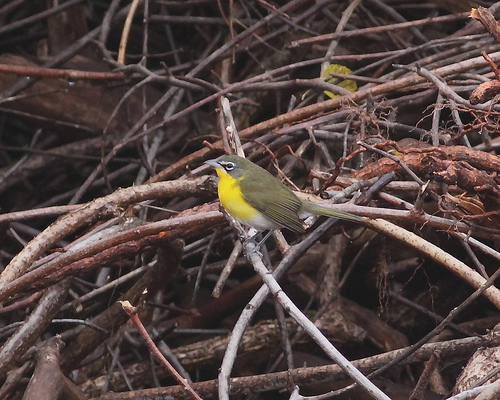

In [14]:
# Input Image
im

In [15]:
# Input Image label with class name
img

'Yellow_breasted_Chat_0028_2981987425.jpg'

In [16]:
# Prediction Confidence
max(predictions[0])

0.9989213

In [17]:
import operator
index, value = max(enumerate(predictions[0]), key=operator.itemgetter(1))

In [18]:
# Predicted Class
classes[index]

'020.Yellow_breasted_Chat'

### Our Model is 99.89% confident the given image is of Yellow_breasted_Chat. 